# Predicting Bike Rentals

In [1]:
# Import necssary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")

In [4]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text xticklabel objects>)

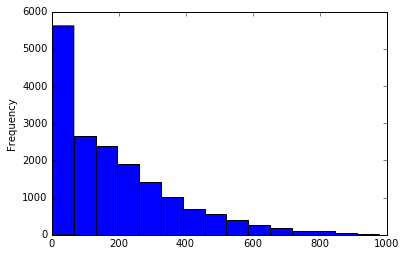

In [5]:
bike_rentals["cnt"].plot(kind="hist", bins = 15)
plt.xticks()

In [6]:
# Correlation between the other columns and the target column "cnt"
bike_rentals.corr().iloc[-1]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [7]:
# To  convert the "hr" column to a scale of 1-4 to represent morning, afternoon, evening and night
def assign_label(value):
    if (value >= 6) and (value < 12):
        return 1
    elif (value >= 12) and (value < 18):
        return 2
    elif (value >= 18) and (value < 24):
        return 3
    elif (value >= 0) and (value < 6):
        return 4

In [8]:
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
bike_rentals

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


## Error Metric

I will be using RMSE- Root Mean Squared error because it works really well with continous data.

In [9]:
# Splitting the Data into Train and Test Sets
train = bike_rentals.sample(frac = 0.8)

test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]



In [10]:
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
3893,3894,2011-06-16,2,0,6,3,0,4,1,2,0.56,0.5303,0.73,0.0896,0,4,4,4
9760,9761,2012-02-16,1,1,2,15,0,4,1,3,0.34,0.3636,0.76,0.0000,3,50,53,2
15897,15898,2012-10-31,4,1,10,2,0,3,1,2,0.30,0.3030,0.81,0.1343,0,7,7,4
12102,12103,2012-05-24,2,1,5,11,0,4,1,1,0.66,0.6212,0.65,0.1343,61,160,221,1
16285,16286,2012-11-16,4,1,11,7,0,5,1,2,0.30,0.3030,0.61,0.1642,5,362,367,1


In [11]:
test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
17,18,2011-01-01,1,0,1,17,0,6,0,2,0.44,0.4394,0.82,0.2836,15,52,67,2
23,24,2011-01-01,1,0,1,23,0,6,0,2,0.46,0.4545,0.88,0.2985,15,24,39,3
25,26,2011-01-02,1,0,1,1,0,0,0,2,0.44,0.4394,0.94,0.2537,1,16,17,4


### Models

#### Linear Regression

In [12]:
## Ignore the "casual" and "registered" columns because "cnt" is derived from them
## Also "dteday" because it doesn't add meaningful information
drop = ["casual", "registered", "dteday", "cnt"]
features = list(bike_rentals.drop(drop, axis = 1).columns)

In [13]:
features

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(train[features], train["cnt"])
pred_lin = lin_reg.predict(test[features])


In [15]:
def do_RMSE(true, pred):
    """ Custom RMSE function
    """
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    return rmse

In [16]:
rmse_lin = do_RMSE(test["cnt"], pred_lin)

In [17]:
rmse_lin

133.28200653684164

The LinearRegresion Model gave an error of 133.53 which is very high, which may be due to the fact that the data has a few extremely high rental counts [Check Histogram plot above] but otherwise mostly low counts. Larger errors are penalized more with RMSE, which leads to a higher total error.

#### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
decision_reg = DecisionTreeRegressor()
decision_reg.fit(train[features],train["cnt"])
pred_decision = decision_reg.predict(test[features])
rmse_decision = do_RMSE(test["cnt"], pred_decision)



In [20]:
rmse_decision

58.38379427402771

In [21]:
min_samples_leaf = range(2, 10)
min_samples_split = range(2,10)
max_depth = range(2, 20)

lowest_RMSE = 100000000
for i in min_samples_leaf:
    for j in min_samples_split:
        for k in max_depth:
            
            decision_reg = DecisionTreeRegressor(min_samples_leaf=i, 
                                                 min_samples_split= j,
                                                max_depth = k, random_state = 1)
            decision_reg.fit(train[features], train["cnt"])
            predictions = decision_reg.predict(test[features])
            RMSE = do_RMSE(test["cnt"], predictions)
            if RMSE < lowest_RMSE:
                lowest_RMSE = RMSE
                best_para = {"min_samples_leaf": i, "min_samples_split": j, "max_depth":k }
                
print(best_para, lowest_RMSE)

{'min_samples_leaf': 6, 'min_samples_split': 2, 'max_depth': 18} 51.87564302925814


Decision Trees - non-linear predictors- have a higher accuracy than linear regression. An even higher accuracy was gotten after tuning the hypermeters a little

#### Random Forest

In [22]:
# Import random forest

from sklearn.ensemble import RandomForestRegressor


In [23]:
rand_forest = RandomForestRegressor()
rand_forest.fit(train[features], train["cnt"])

rand_pred = rand_forest.predict(test[features])

In [24]:
rand_rmse = do_RMSE(test["cnt"], rand_pred)
rand_rmse

43.52441823550063

In [25]:
# # Experimenting with hyperparameters
# min_samples_leaf = range(2, 10)
# min_samples_split = range(2,10)
# max_depth = range(2, 20)
# n_estimators = range(10, 101)

# count = 0
# lowest_RMSE = 100000000
# for i in min_samples_leaf:
#     count += 1
#     print(count)
#     for j in min_samples_split:
#         for k in max_depth:
#             for l in n_estimators:
            
#                 rand_forest = RandomForestRegressor(n_estimators=l,min_samples_leaf=i, 
#                                                      min_samples_split= j,
#                                                     max_depth = k, random_state = 1)
#                 rand_forest.fit(train[features], train["cnt"])
#                 predictions = rand_forest.predict(test[features])
#                 RMSE = do_RMSE(test["cnt"], predictions)
#                 if RMSE < lowest_RMSE:
#                     lowest_RMSE = RMSE
#                     best_para = {"n_estimators": l, "min_samples_leaf": i, 
#                                  "min_samples_split": j, "max_depth":k }
                
# print(best_para, lowest_RMSE)

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
model = RandomForestRegressor(random_state=1)
hyperparameters = dict(min_samples_leaf = range(2, 10),
                       min_samples_split = range(2,10),
                       max_depth = range(2, 20),
                       n_estimators = range(10, 30))

GS = RandomizedSearchCV(estimator=model,param_distributions=hyperparameters, cv = 5,n_jobs = 1, n_iter=200,verbose = True, scoring="neg_mean_squared_error")

In [28]:
GS

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=200, n_jobs=1,
          param_distributions={'n_estimators': range(10, 30), 'min_samples_leaf': range(2, 10), 'max_depth': range(2, 20), 'min_samples_split': range(2, 10)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=True)

In [29]:
GS.fit(train[features], train["cnt"])

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  9.6min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=200, n_jobs=1,
          param_distributions={'n_estimators': range(10, 30), 'min_samples_leaf': range(2, 10), 'max_depth': range(2, 20), 'min_samples_split': range(2, 10)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=True)

In [30]:
GS.best_params_

{'max_depth': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 28}

In [31]:
RS = RandomForestRegressor(max_depth=GS.best_params_["max_depth"], 
                           min_samples_leaf=GS.best_params_["min_samples_leaf"],
                          min_samples_split=GS.best_params_["min_samples_split"],
                          n_estimators = GS.best_params_["n_estimators"])
RS

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=2,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=28, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
RS.fit(train[features], train["cnt"])
RS_predict = RS.predict(test[features])

RS_RMSE = do_RMSE(test["cnt"], RS_predict)
RS_RMSE

42.529543014674836

By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.